# Financial Analysis
### using 'Alphavantage' API

In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy.stats import linregress
from config import api_key
from pprint import pprint

In [2]:
# Input company stock ticker #
print("Enter company stock ticker:")
ticker = (input()).upper()

# Company Info reports API url #
info_url = ("https://www.alphavantage.co/query?function=OVERVIEW&symbol=" + ticker + "&apikey=" + api_key)

# Intraday Trading reports API url (interval set at 15 minutes) #
intraday_url = ("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=" + ticker + "&interval=15min&outputsize=full&apikey=" + api_key)

# Income Statement reports API url #
incstat_url = ("https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=" + ticker + "&apikey=" + api_key)

# Balance Sheet reports API url #
balsheet_url = ("https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=" + ticker + "&apikey=" + api_key)

# Cash Flow reports API url #
cf_url = ("https://www.alphavantage.co/query?function=CASH_FLOW&symbol="+ ticker + "&apikey="+ api_key)

# Get responses #
info_response = requests.get(info_url)
print(info_response)
info_data = info_response.json()

incstat_response = requests.get(incstat_url)
print(incstat_response)
incstat_data = incstat_response.json()

balsheet_response = requests.get(balsheet_url)
print(balsheet_response)
balsheet_data = balsheet_response.json()

cf_response = requests.get(cf_url)
print(cf_response)
cf_data = cf_response.json()

intraday_response = requests.get(intraday_url)
print(intraday_response)
intraday_data = intraday_response.json()

Enter company stock ticker:
vfc
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


### Company Information 

In [3]:
# Print company information #
co_name = info_data['Name']
pprint(info_data)

{'200DayMovingAverage': '78.9704',
 '50DayMovingAverage': '80.0977',
 '52WeekHigh': '89.68',
 '52WeekLow': '44.1941',
 'Address': '8505 East Orchard Road, Greenwood Village, CO, United States, '
            '80111',
 'AnalystTargetPrice': '93.85',
 'AssetType': 'Common Stock',
 'Beta': '0.974',
 'BookValue': '8.026',
 'Country': 'USA',
 'Currency': 'USD',
 'Description': 'V.F. Corporation engages in the design, production, '
                'procurement, marketing, and distribution of branded lifestyle '
                'apparel, footwear, and related products for men, women, and '
                'children in the Americas, Europe, and the Asia-Pacific. It '
                'operates through four segments: Outdoor, Active, and Work. '
                'The company offers outdoor, merino wool and other natural '
                'fibers-based, lifestyle, and casual apparel; equipment; '
                'accessories; outdoor lifestyle, performance-based, youth '
                'culture/ac

#### Intraday Report <em>15 minute</em> intervals

In [4]:
# Generate Intraday reportings data frame
intraday15_df = pd.DataFrame(intraday_data['Time Series (15min)'])
intraday15_df = intraday15_df.T
intraday15_df

,1. open,2. high,3. low,4. close,5. volume
2021-03-17 19:45:00,78.3500,78.3500,78.3500,78.3500,200
2021-03-17 18:45:00,78.3500,78.3500,78.3500,78.3500,400
2021-03-17 16:15:00,78.3500,78.3500,78.3500,78.3500,69531
2021-03-17 16:00:00,78.2000,78.4000,78.1300,78.3500,373202
2021-03-17 15:45:00,77.9600,78.4400,77.9550,78.1900,154442
...,...,...,...,...,...
2021-02-04 10:15:00,79.7585,80.1711,79.6789,80.0268,47650
2021-02-04 10:00:00,79.4106,79.7683,79.2018,79.7683,30208
2021-02-04 09:45:00,79.2714,79.5298,78.9434,79.4503,78171
2021-02-04 09:30:00,79.3907,79.3907,78.9832,78.9832,730


#### Income Statement <em>Quarterly</em> reportings data frames

In [5]:
# Generate Income Statement quarterly reportings as Pandas data frames #
incstat_quart_report_df = pd.DataFrame(incstat_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #  
incstat_quart_report_df.iloc[:, 2: ] = incstat_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
incstat_quart_report_df.iloc[:,0] = incstat_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
incstat_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2020-12-31,USD,1626517000,2971541000,1345024000,1345024000,411999000,1214518000,None,1214518000,...,None,None,386707000,59048000,None,327659000,None,421022000,None,347240000
1,2020-09-30,USD,1884483000,3384746000,1500263000,1500263000,319948000,1301781000,None,1330624000,...,None,None,293661000,50415000,None,243246000,None,457607000,None,256722000
2,2020-06-30,USD,1325918000,2608324000,506951000,506951000,-246809000,1005970000,None,816151000,...,None,None,-312945000,-35203000,None,-277742000,None,395775000,None,-285613000
3,2020-03-31,USD,583342000,1076293000,492951000,492951000,-425107000,807651000,None,830151000,...,None,None,-497945000,71906000,None,-569851000,None,-228528000,None,-483776000
4,2019-12-31,USD,899227000,1439063000,1500263000,1500263000,553859000,917258000,None,1324334000,...,None,None,539836000,87089000,None,452747000,None,-166872000,None,465003000
5,2019-09-30,USD,1762951000,3227712000,1464761000,1464761000,578546000,1242131000,None,1246973000,...,None,None,561425000,-87576000,None,649001000,None,654020000,None,649001000
6,2019-06-30,USD,1796961000,3393268000,1596307000,1596307000,95965000,1216896000,None,1218415000,...,None,None,85936000,26643000,None,97249000,None,744186000,None,49221000
7,2019-03-31,USD,1236765000,2271479000,1034714000,1034714000,194384000,1109673000,None,1103473000,...,None,None,175687000,46883000,None,128804000,None,257169000,None,128804000
8,2018-12-31,USD,1041765000,1682650000,640885000,640885000,591905000,1030488000,0,1030545000,...,None,None,566284000,103158000,None,463126000,None,228490000,None,463509000
9,2018-09-30,USD,1743200000,3361100000,1617900000,1617900000,658669000,1286600000,0,1183600000,...,None,None,599101000,91980000,None,507121000,None,87571000,None,507121000


In [6]:
# Print Income Statement categories #
incstat_categories = pd.DataFrame(incstat_quart_report_df.columns[2:])
incstat_categories

,0
0,grossProfit
1,totalRevenue
2,costOfRevenue
3,costofGoodsAndServicesSold
4,operatingIncome
5,sellingGeneralAndAdministrative
6,researchAndDevelopment
7,operatingExpenses
8,investmentIncomeNet
9,netInterestIncome


#### Balance Sheet <em>Quarterly</em> reportings data frames

In [7]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
balsheet_quart_report_df = pd.DataFrame(balsheet_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
balsheet_quart_report_df.iloc[:, 2: ] = balsheet_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
balsheet_quart_report_df.iloc[:,0] = balsheet_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
balsheet_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2020-12-31,USD,13744341000,7285219000,3254236000,3254236000,1075983000,None,6459122000,955845000,...,300754000,None,None,120185000,2321592000,3138174000,None,300495000,97746000,390985837
1,2020-09-30,USD,12941266000,6680206000,1877398000,1877398000,1434843000,None,6261060000,933990000,...,14364000,None,None,114356000,2232056000,2945238000,None,-44953000,97491000,389964718
2,2020-06-30,USD,12479045000,6261137000,2145111000,2145111000,1402858000,None,6217908000,957309000,...,20281000,None,None,91283000,2241192000,2912598000,None,-298088000,97410000,389641245
3,2020-03-31,USD,11133251000,5027016000,1369028000,1369028000,1293912000,None,6106235000,954406000,...,1229830000,None,None,126781000,2143764000,3357334000,None,7309000,97203000,388812158
4,2019-12-31,USD,10814262000,4155698000,583951000,583951000,1564970000,None,6658564000,2207402000,...,60678000,None,None,68910000,1121238000,4567590000,None,1182228000,98632000,394528067
5,2019-09-30,USD,11270355000,4775207000,507605000,507605000,1890716000,None,6495148000,2135504000,...,489307000,None,None,50634000,1099113000,4647619000,None,1405988000,99716000,402000000
6,2019-06-30,USD,10401964000,3990855000,606080000,606080000,1665132000,None,6411109000,2146247000,...,72726000,None,None,63443000,1132706000,4151614000,None,931134000,99481000,402000000
7,2019-03-31,USD,10356785000,4673457000,543011000,543011000,1943030000,None,5683328000,1057268000,...,670318000,None,None,18590000,1280781000,4298516000,None,1179601000,99206000,396824662
8,2018-12-31,USD,10284310000,4612091000,535312000,535312000,1866075000,None,5672219000,1041640000,...,5576000,None,None,53340000,1285399000,4300624000,None,1258327000,98868000,395472173
9,2018-09-30,USD,11130425000,5417954000,352781000,352781000,2247908000,None,5712471000,1035671000,...,3726996000,None,None,11358000,1291578000,4179556000,0,1147787000,99290000,397161808


In [8]:
# Print Balance Sheet categories #
balsheet_categories = pd.DataFrame(balsheet_quart_report_df.columns[2:])
#balsheet_categories

#### Cash Flow <em>Quarterly</em> reportings data frames

In [9]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
cf_quart_report_df = pd.DataFrame(cf_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
cf_quart_report_df.iloc[:, 2: ] = cf_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
cf_quart_report_df.iloc[:,0] = cf_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
cf_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2020-12-31,USD,1059248000,None,None,None,None,65727000,39945000,228601000,...,-191266000,None,None,None,None,7221000,None,1347860000,None,347240000
1,2020-09-30,USD,85996000,None,None,None,None,75827000,43310000,-648190000,...,-186892000,None,None,None,None,-7221000,None,-271430000,None,256722000
2,2020-06-30,USD,-3188000,None,None,None,None,63026000,69191000,372754000,...,-186746000,None,None,None,None,-15634000,None,774318000,None,-285613000
3,2020-03-31,USD,32901000,None,None,None,None,267619000,333836000,None,...,-748663000,None,None,None,None,-844617000,None,None,None,679449000
4,2019-12-31,USD,1207104000,None,None,None,None,204341000,223614000,None,...,-562298000,None,None,None,None,-364917000,None,None,None,1163225000
5,2019-09-30,USD,-365478000,None,None,None,None,321129000,134172000,None,...,-373604000,None,None,None,None,50659000,None,None,None,698222000
6,2019-06-30,USD,-66180000,None,None,None,None,159178000,60782000,None,...,-202538000,None,None,None,None,7199000,None,None,None,49221000
7,2019-03-31,USD,227560000,None,None,None,None,84644000,55384000,55741000,...,-201885000,None,None,None,None,48620000,None,17007000,14811000,128804000
8,2018-12-31,USD,1333712000,None,None,None,None,71366000,55054000,409055000,...,-201325000,None,None,None,None,-150196000,None,162871000,None,463509000
9,2018-09-30,USD,-174193000,None,None,None,None,73865000,71277000,-812326000,...,-182334000,None,None,None,None,-480000,None,-116438000,None,507121000


In [10]:
# Print Cash Flow categories #
cf_categories = pd.DataFrame(cf_quart_report_df.columns[2:])
cf_categories

,0
0,operatingCashflow
1,paymentsForOperatingActivities
2,proceedsFromOperatingActivities
3,changeInOperatingLiabilities
4,changeInOperatingAssets
5,depreciationDepletionAndAmortization
6,capitalExpenditures
7,changeInReceivables
8,changeInInventory
9,profitLoss


## Book Value

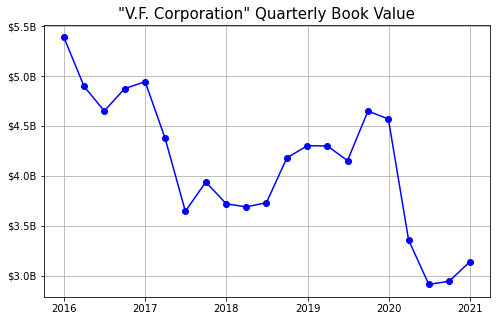

In [11]:
bookval_quart = (balsheet_quart_report_df.iloc[:, 2]) - (balsheet_quart_report_df.iloc[:, 19])
bookval_quart = pd.DataFrame(bookval_quart)
bookval_quart.columns = ['Quarterly Book Value']
bookval_quart['Fiscal Date Ending'] = balsheet_quart_report_df.iloc[: , 0]
bookval_quart = bookval_quart[['Fiscal Date Ending', 'Quarterly Book Value']]

# plot Quarterly Accounting Value

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(bookval_quart['Fiscal Date Ending'],
       bookval_quart['Quarterly Book Value'],
       marker = 'o',
        color = 'blue')
ax.yaxis.set_major_formatter(billions)
ax.set_title(f'"{co_name}" Quarterly Book Value', fontsize = 15)
ax.grid()
plt.savefig(f'../visualizations/{co_name}bookval_quart_plot.png')
plt.show()

## Return On Sales Ratio 

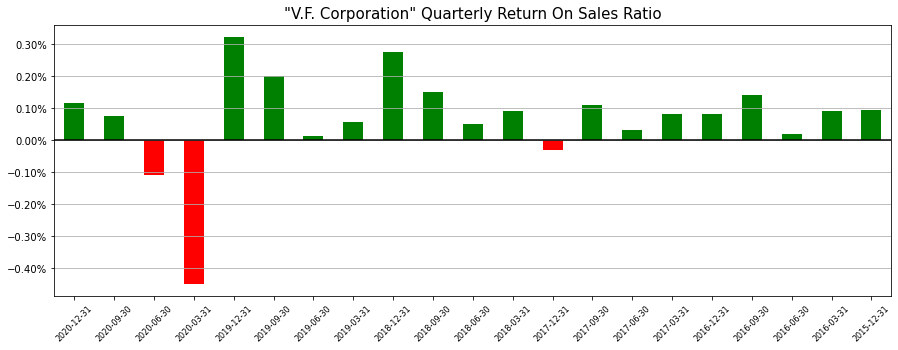

In [12]:
# Creating Quarterly Return On Sales Ratio data frame #
ros_ratio_quart = (incstat_quart_report_df.iloc[:, 25]) / (incstat_quart_report_df.iloc[:, 3])
ros_ratio_quart = pd.DataFrame(ros_ratio_quart)
ros_ratio_quart.columns = ['Quarterly Return On Sales Ratio']
ros_ratio_quart['Fiscal Date Ending'] = incstat_quart_report_df.iloc[: , 0]
ros_ratio_quart['Fiscal Date Ending'] = pd.to_datetime(ros_ratio_quart['Fiscal Date Ending']).dt.date
ros_ratio_quart = ros_ratio_quart[['Fiscal Date Ending', 'Quarterly Return On Sales Ratio']]

# First - plot Return On Sales Ratio #
ros_ratio_quart['values'] = ros_ratio_quart['Quarterly Return On Sales Ratio'] > 0

fig, ax = plt.subplots(figsize=(15, 5))
ros_ratio_quart['Quarterly Return On Sales Ratio'].plot(kind='bar', color = ros_ratio_quart['values'].map({True: 'g', False: 'r'}), ax=ax)
ax.axhline(0, color='k')
ax.set_xticklabels(ros_ratio_quart['Fiscal Date Ending'], rotation = 45, fontsize = 8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title(f'"{co_name}" Quarterly Return On Sales Ratio', fontsize = 15)
ax.grid(axis = 'y')
plt.savefig(f'../visualizations/{co_name}ros_ratio_graph.png')
plt.show()

## Free Cash Flow v. Net Income

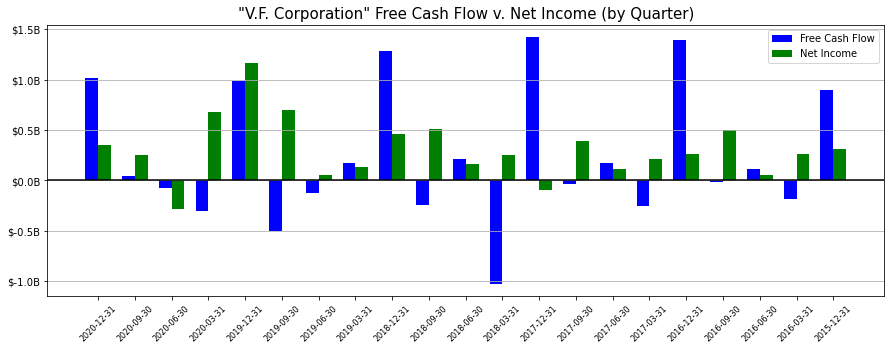

In [13]:
# Generate Quartertly Free Cash Flow v. Net Income #
fcf_quart_data = pd.DataFrame(cf_quart_report_df[['operatingCashflow', 'capitalExpenditures']])
fcf_quart = (fcf_quart_data.operatingCashflow) - (fcf_quart_data.capitalExpenditures)
fcf_quart = pd.DataFrame(fcf_quart)
fcf_quart.columns = ['Free Cash Flow']
fcf_quart['Fiscal Date Ending'] = cf_quart_report_df.iloc[:, 0]
fcf_quart['Fiscal Date Ending'] = pd.to_datetime(fcf_quart['Fiscal Date Ending']).dt.date
fcf_quart['Net Income'] = cf_quart_report_df.iloc[:, 28]
fcf_quart = fcf_quart[['Fiscal Date Ending', 'Free Cash Flow', 'Net Income']]
fcf_quart


labels = fcf_quart['Fiscal Date Ending']
fcf = fcf_quart['Free Cash Flow']
net_inc = fcf_quart['Net Income']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize = (15, 5))
rects1 = ax.bar(x - width/2, fcf, width, label='Free Cash Flow', color='blue')
rects2 = ax.bar(x + width/2, net_inc, width, label='Net Income', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhline(0, color='k')
ax.set_title(f'"{co_name}" Free Cash Flow v. Net Income (by Quarter)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation= 45, fontsize = 8)
ax.yaxis.set_major_formatter(billions)
ax.grid(axis = 'y')
ax.legend()
plt.savefig(f'../visualizations/{co_name}fcf_netinc_graph.png')
plt.show()

## Linear Regression Analysis - High & Low Difference v. Stock Volume

In [14]:
high = pd.to_numeric(intraday15_df['2. high'])
low = pd.to_numeric(intraday15_df['3. low'])
volume = pd.to_numeric(intraday15_df['5. volume'])
highlow_diff_df = pd.DataFrame(high)
highlow_diff_df['low'] = low 
highlow_diff_df['volume'] = volume
highlow_diff_df = highlow_diff_df.rename(columns = {'2. high' : 'high'})
highlow_diff_df['difference'] = (highlow_diff_df['high']) - (highlow_diff_df['low'])
highlow_diff_df = highlow_diff_df.sort_values('volume')

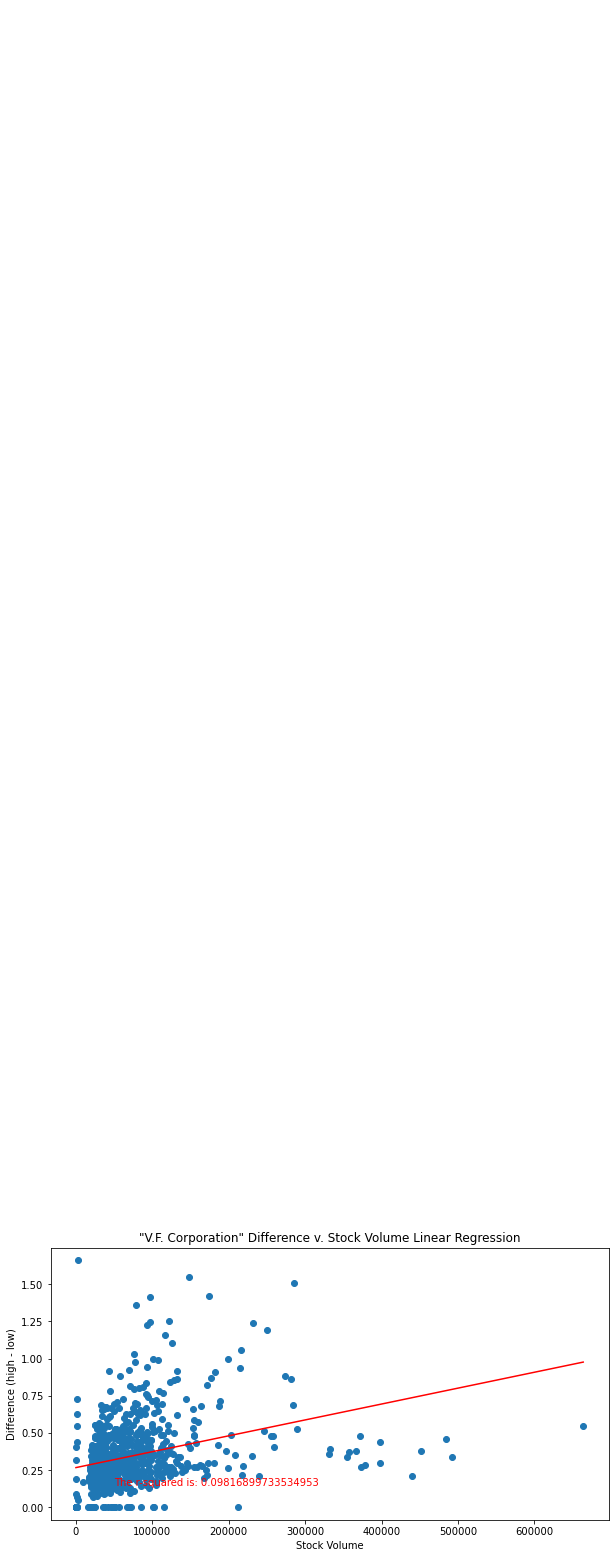

In [15]:
x_values = highlow_diff_df['volume']
y_values = highlow_diff_df['difference']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'"{co_name}" Difference v. Stock Volume Linear Regression')
plt.xlabel('Stock Volume')
plt.ylabel('Difference (high - low)')
plt.annotate(f"The r-squared is: {rvalue**2}", xy =(50000, .15), color="red")
plt.savefig(f'../visualizations/{co_name}linereg_plot.png')
plt.show()

### Generate Data Sources as HTML

In [16]:
intraday15_df_html = intraday15_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
intraday15 = open("intraday15_df_html.html", "w")
intraday15.write(intraday15_df_html)
intraday15.close()

In [17]:
incstat_quart_report_df_html = incstat_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
incstat_quart_report = open("incstat_quart_df_html.html", "w")
incstat_quart_report.write(incstat_quart_report_df_html)
incstat_quart_report.close()

In [18]:
balsheet_quart_report_df_html = balsheet_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
balsheet_quart_report = open("balsheet_quart_df_html.html", "w")
balsheet_quart_report.write(balsheet_quart_report_df_html)
balsheet_quart_report.close()

In [19]:
cf_quart_report_df_html = cf_quart_report_df.to_html(classes=["table-bordered", "table-striped", "table-hover"])
cf_quart_report = open("cf_quart_report_df_html.html", "w")
cf_quart_report.write(cf_quart_report_df_html)
cf_quart_report.close()

### Generate Data Sources as CSV

In [20]:
intraday15_df_csv = intraday15_df.to_csv(index=False)
intraday15_csv = open("csv/intraday15_df_csv.csv", "w")
intraday15_csv.write(intraday15_df_csv)
intraday15_csv.close()

In [21]:
incstat_quart_report_df_csv = incstat_quart_report_df.to_csv(index=False)
incstat_quart_report_csv = open("csv/incstat_quart_df_csv.csv", "w")
incstat_quart_report_csv.write(incstat_quart_report_df_csv)
incstat_quart_report_csv.close()

In [22]:
balsheet_quart_report_df_csv = balsheet_quart_report_df.to_csv(index=False)
balsheet_quart_report_csv = open("csv/balsheet_quart_df_csv.csv", "w")
balsheet_quart_report_csv.write(balsheet_quart_report_df_csv)
balsheet_quart_report_csv.close()

In [23]:
cf_quart_report_df_csv = cf_quart_report_df.to_csv(index=False)
cf_quart_report_csv = open("csv/cf_quart_report_df_csv.csv", "w")
cf_quart_report_csv.write(cf_quart_report_df_csv)
cf_quart_report_csv.close()